<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общие-сведения" data-toc-modified-id="Общие-сведения-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общие сведения</a></span><ul class="toc-item"><li><span><a href="#contract" data-toc-modified-id="contract-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>contract</a></span></li><li><span><a href="#personal" data-toc-modified-id="personal-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>personal</a></span></li><li><span><a href="#internet" data-toc-modified-id="internet-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>internet</a></span></li><li><span><a href="#phone" data-toc-modified-id="phone-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>phone</a></span></li></ul></li><li><span><a href="#Анализ-датасета-и-объединение" data-toc-modified-id="Анализ-датасета-и-объединение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ датасета и объединение</a></span><ul class="toc-item"><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Формирование-общей-таблицы" data-toc-modified-id="Формирование-общей-таблицы-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Формирование общей таблицы</a></span></li></ul></li><li><span><a href="#Грубая-проверка-очевидных-гипотез" data-toc-modified-id="Грубая-проверка-очевидных-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Грубая проверка очевидных гипотез</a></span><ul class="toc-item"><li><span><a href="#Слишком-дорого" data-toc-modified-id="Слишком-дорого-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Слишком дорого</a></span></li><li><span><a href="#Ало?-НЕ-СЛЫШУ!" data-toc-modified-id="Ало?-НЕ-СЛЫШУ!-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Ало? НЕ СЛЫШУ!</a></span></li></ul></li><li><span><a href="#Препроцессинг" data-toc-modified-id="Препроцессинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Препроцессинг</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Деревянные-модели" data-toc-modified-id="Деревянные-модели-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Деревянные модели</a></span><ul class="toc-item"><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#Бустинг" data-toc-modified-id="Бустинг-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Бустинг</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-наилучшей-модели" data-toc-modified-id="Тестирование-наилучшей-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование наилучшей модели</a></span><ul class="toc-item"><li><span><a href="#Метрики-и-адекватность" data-toc-modified-id="Метрики-и-адекватность-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Метрики и адекватность</a></span></li><li><span><a href="#Важность-признаков-и-интерпретация" data-toc-modified-id="Важность-признаков-и-интерпретация-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Важность признаков и интерпретация</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Отчёт" data-toc-modified-id="Отчёт-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Отчёт</a></span></li></ul></div>

# Прогнозирование оттока клиентов телекома

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

Данные представлены в виде таблиц:
* `contract_new.csv` — информация о договоре
* `personal_new.csv` — персональные данные клиента
* `internet_new.csv` — информация об интернет-услугах
* `phone_new.csv` — информация об услугах телефонии

*План:*

* Ознакомление с данными
* Первичный анализ датасета
* Предобработка данных и объединение в один датафрейм
* Обучение моделей логистической регрессии, случайного леса и градиентного бустинга
* Проверка качества наилучшей сети(ключевой параметр roc-auc > 0.85) и исследование важности признаков

## Общие сведения

In [1]:
!pip install phik
!pip install shap
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import phik
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import QuantileTransformer, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

import lightgbm
from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, plot_roc_curve

import re
from sklearn.utils import shuffle

import shap
shap.initjs()

In [2]:
datasets_path = 'datasets' if os.name == 'nt' else '/datasets'
datasets = [f for f in os.listdir(datasets_path)]
contract, internet, personal, phone = [pd.read_csv(f'{datasets_path}/{file}') for file in datasets]

### contract

In [3]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [4]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
contract['customerID'].duplicated().sum()

0

Данные без дубликатов и их не много, необходимо всеми силами избегать удаления объектов.
Целевой признак содержится в столбце `EndDate` в виде даты, в дальнейшем необходимо привести признак к бинарному виду.
В признаке `TotalCharges` есть нечисловые значения    

### personal

In [6]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [8]:
personal['customerID'].duplicated().sum()

0

В этой таблице содержатся персональные категориальные данные клиента, скорее всего они взяты из паспорта. Отметим, что `SeniorCitizen` представлен числовым форматом

### internet

In [9]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [11]:
internet['customerID'].duplicated().sum()

0

В этой таблице содержатся персональные категориальные данные клиентов, примечательно что объектов тут меньше, скорее всего эти люди не пользуются интернетом, при объединении таблиц заполним пропуски `No`, а пропуски в `InternetService` `No_internet`

### phone

In [12]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [13]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [14]:
phone['customerID'].duplicated().sum()

0

В этой таблице отражается возможность ведения второй линии во время звонка. Здесь возможная причина пропусков таже - пользователь не пользуется связью, при объединении заполним пропуски `No_phone`

**Вывод:** В данных нет дубликатов, следовательно не будет проблем с объединением по customerID, после этого все недостающие значения можно закрыть заглушкой, необходимо также перекодировать `BeginDate` в бинарный

## Анализ датасета и объединение

Зададим полезную в дальнейшем функцию постройки множества круговых диаграмм

In [15]:
def plt_pie(df):
    i = 1
    for col in df.drop(columns='customerID'):
        if df[col].dtype != 'O':
            continue
        plt.subplot(3, 3, i)
        df_n = df.groupby(col)['customerID'].count()
        plt.pie(
            df_n,
            autopct='%1.2f%%', labels=df_n.index);
        plt.title(col)
        i+=1
    plt.gcf().set_size_inches(17,10);

### Анализ

Посмотрим на графики и узнаем кто эти люди без оплат в `TotalCharges`

In [16]:
contract[contract['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [17]:
contract[contract['TotalCharges'] == ' ']['customerID'].count()

11

In [18]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format = '%Y-%m-%d')

In [19]:
contract['BeginDate'].max()

Timestamp('2020-02-01 00:00:00')

Этих индивидов всего 11 штук и все в одном месяце - последнем в выборке, следует полагать, что `TotalCharges` обновляется на следующий месяц. Анализировать таких клиентов нет большого смысла, можно их дропнуть

In [20]:
contract = contract[contract['TotalCharges'] != ' ']

Теперь приведем `TotalCharges` к числовому формату и посмотрим на графики

In [21]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'])

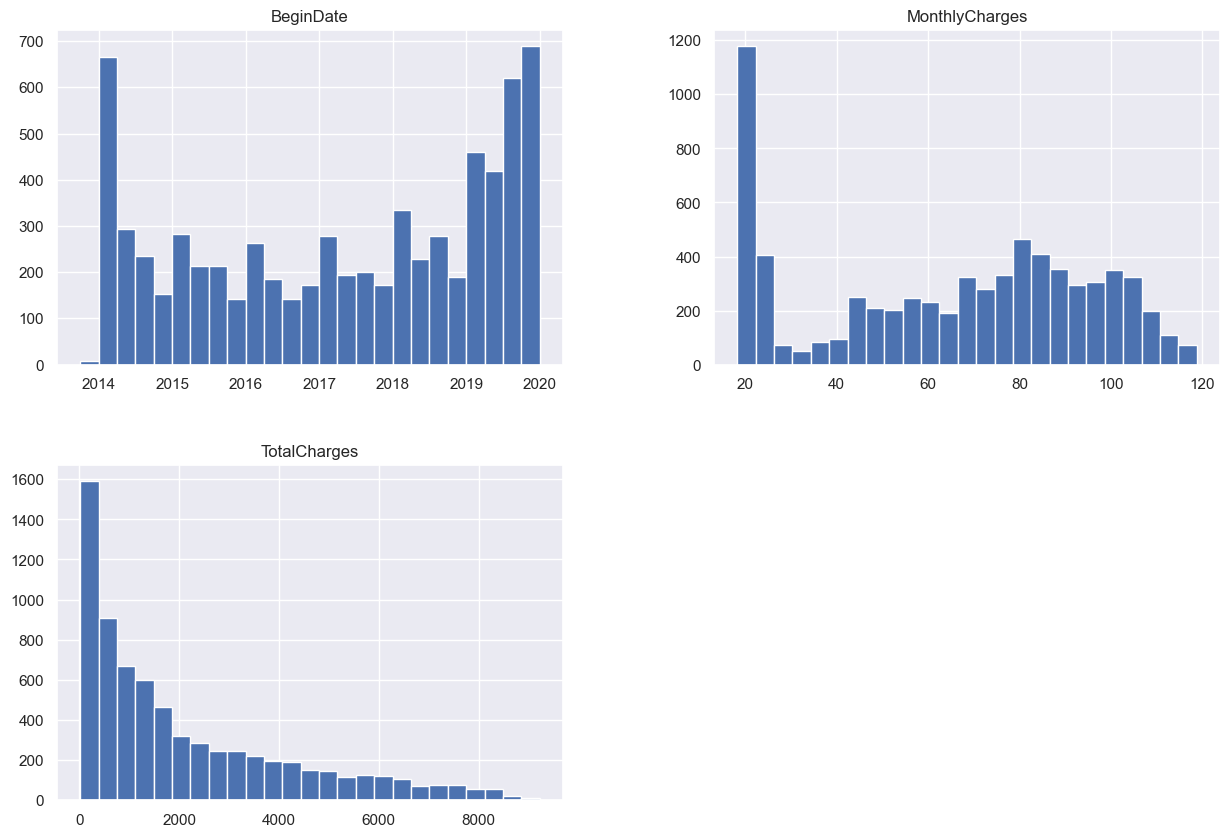

In [22]:
contract.hist(figsize=(15,10), bins=25);

Видно что кампания развивается и привлекает новых клиентов, это хорошо. Распределения `TotalCharges` и `MonthlyCharges` выглядят вполне обычно. Теперь преобразуем `EndDate` в бинарный формат и посмотрим на категориальные признаки

In [23]:
contract['EndDateAim'] = contract['EndDate'].apply(func=(lambda x: 'Yes' if x != 'No' else 'No'))

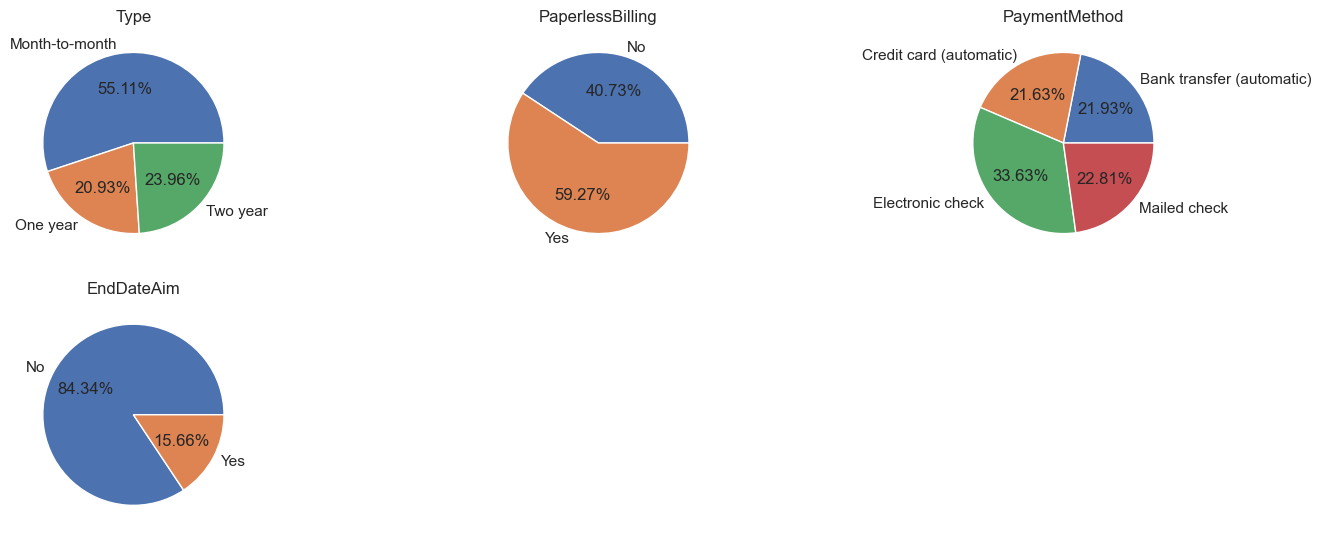

In [24]:
plt_pie(contract.drop(columns=['EndDate']))

Наблюдается дисбаланс целевого признака, в остальном все нормально. Остальные таблицы не слишком информативны - лучше будет объединить таблицы и затем определить профиль каждой целевой категории. Преобразуем `SeniorCitizen` в `object` для удобства и объединим таблицы

In [25]:
personal['SeniorCitizen'] = personal['SeniorCitizen'].astype('object')

### Формирование общей таблицы

Т.к. целевой признак находится в таблице `contract`, то соединять будем по ней

In [26]:
df = contract.merge(personal, on='customerID', how='left')

In [27]:
len(df)

7032

Тут мы потеряли 11 клиентов - тех, кто пришел в последнем месяце

Т.к. клиенты не попавшие в таблицы internet и phone не пользуются соответствующими услугами, заполним пропуски заглушкой `No_internet` в графе провайдера и `No_phone` в графе о мультилинии, чтобы не плодить дополнительные признаки. Оставшиеся признаки связанные с интернетом заполним просто значением `No` 

In [28]:
df = df.merge(internet, on='customerID', how='left')
df['InternetService'].fillna('No_internet', inplace=True)
df.fillna('No', inplace=True)
df = df.merge(phone, on='customerID', how='left')
df.fillna('No_phone', inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   object        
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   EndDateAim        7032 non-null   object        
 9   gender            7032 non-null   object        
 10  SeniorCitizen     7032 non-null   int64         
 11  Partner           7032 non-null   object        
 12  Dependents        7032 non-null   object        
 13  InternetService   7032 non-null   object        
 14  OnlineSecurity    7032 n

In [30]:
df.head(15)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EndDateAim,gender,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,No,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,No_phone
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,No,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,No,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,No,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,No_phone
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,No,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96,No,Female,...,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,No,Male,...,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48,No,Female,...,No,No,DSL,Yes,No,No,No,No,No,No_phone
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68,No,Female,...,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,Yes,Male,...,No,Yes,DSL,Yes,Yes,No,No,No,No,No


**Вывод:** Проведен первичный анализ датасета и объединены таблицы в одну. Исправлены типы данных. Обнаружен дисбаланс классов. Все готово к проверке основных гипотез.

## Грубая проверка очевидных гипотез

Дополнительно проверим самые очевидные предположения:
* Дорогое обслуживание
* Плохое качество связи/интернета

### Слишком дорого

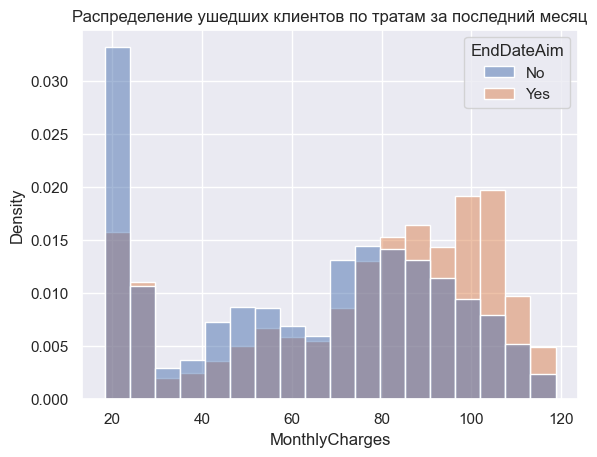

In [31]:
sns.histplot(data=df, x="MonthlyCharges", hue="EndDateAim", stat="density", common_norm=False)
plt.title('Распределение ушедших клиентов по тратам за последний месяц');

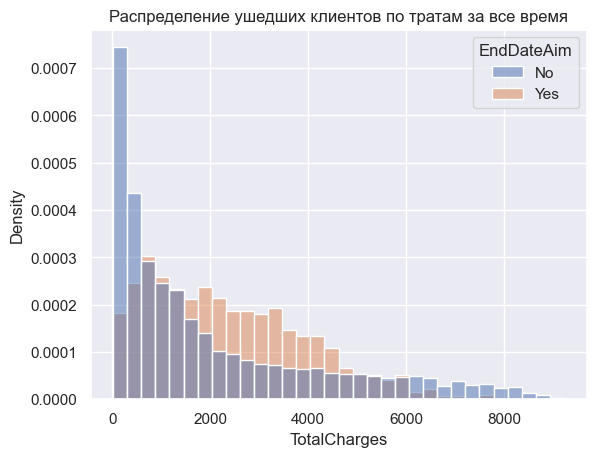

In [32]:
sns.histplot(data=df, x="TotalCharges", hue="EndDateAim", stat="density", common_norm=False);
plt.title('Распределение ушедших клиентов по тратам за все время');

Как видно, ушедшие клиенты больше тратились, как в последний месяц, так и в целом, возможно стоит дать небольшую скидку клиентам, тратящимся более 100 у.е. в месяц

### Ало? НЕ СЛЫШУ!

Для удобства переведем `EndDate` в 1/0

In [33]:
df['EndDateAim'] = df['EndDateAim'].apply(func=(lambda x: 1 if x != 'No' else 0))

In [34]:
df.pivot_table(values=['EndDateAim'], index='MultipleLines', aggfunc='mean').style.format("{:,.1%}")

,EndDateAim
MultipleLines,
No,9.5%
No_phone,15.1%
Yes,22.9%


Как видно, люди в среднем использующие телефон и не использующие уходят равновероятно, однако стоит обратить внимание на то, что клиенты использующие мультилинию уходят в 2 раза чаще тех, кто ее не использует

In [35]:
df.pivot_table(values=['EndDateAim'], index='InternetService', aggfunc='mean').style.format("{:,.1%}")

,EndDateAim
InternetService,
DSL,14.3%
Fiber optic,19.2%
No_internet,10.5%


А вот с интернетом беда - лишь 10% не использующие интернет уходят, когда использующие DSL - 14%, а оптику почти 20%. Стоит обратить внимание на соотношение цена/качество интернета

**Вывод:** Проверены гипотезы о высокой цене услуг и плохого качества связи/интернета.
* Люди, использующие и не использующие телефон уходят равновероятно, однако стоит обратить внимание на то, что среди клиентов использующих мультилинию процент ухода в 2 раза больше(19%) чем среди тех кто ее не использует.
* 10% клиентов не использующих интернет уходят, когда использующих DSL - 14%, а оптику почти 20%. Стоит обратить внимание на соотношение цена/качество интернета.
* Оставим вероятностные тесты аналитикам - наша основная задача - ML

## Препроцессинг

In [36]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [37]:
df.loc[df['EndDate'] == 'No', 'EndDate'] = '2020-02-01'
df['EndDate'] = pd.to_datetime(df['EndDate'], format = '%Y-%m-%d')
df['NumDays'] = pd.to_numeric(df['EndDate'] - df['BeginDate']) / (24*60*60 * 10**9)
df['MeanCharges'] = df['TotalCharges'] / df['NumDays']

In [38]:
df.drop(columns=['customerID', 'EndDate', 'BeginDate'], inplace=True)

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'EndDateAim', 'NumDays', 'MeanCharges']


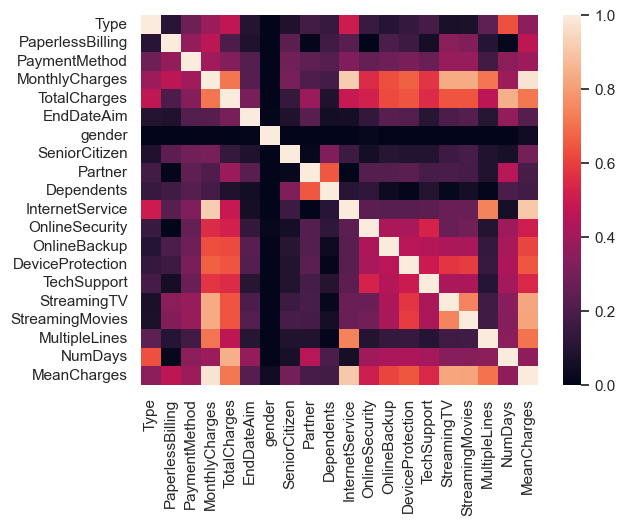

In [39]:
sns.heatmap(df.phik_matrix());

Видно, что customerID сильно коррелирует со всеми признаками, что не удивительно, обязательно дропнем ее. Пока оставим все остальные признаки будем их удалять если модель окажется неудовлетворительной

In [40]:
X, y = df.drop(columns=['EndDateAim']), df['EndDateAim']

X_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, random_state=100423)

In [41]:
categorical_columns = [df.columns[i] for i, col in enumerate(df) if df[col].dtype == 'O']
numerical_columns = [df.columns[i] for i, col in enumerate(df) if df[col].dtype != 'O' and col != 'EndDateAim']

## Обучение моделей

Будем обучать логистическую регрессию, модели случайного леса и градиентного бустинга. В качестве метрики качества используем auc-roc

### Logistic regression

На вход будем подавать сырые данные, а пайплайн с OHE и QuantileTransformer будет их обрабатывать конвейерно.

In [42]:
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')
numerical_preprocessor = QuantileTransformer(output_distribution='normal', random_state=100423)

preprocessor = ColumnTransformer([
    ('ohe', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)],
    n_jobs=-1
)

In [43]:
pipe = Pipeline([('pre', preprocessor), ('clf', LogisticRegression(max_iter=10000, random_state=100423))])

grid={
    'clf__C':[0.1, 1, 10]
}

In [44]:
logistic_regression_model = GridSearchCV(pipe, grid, cv=5, scoring='roc_auc', n_jobs=-1)
logistic_regression_model.fit(X_train, y_train);

In [45]:
logistic_regression_model.best_params_

{'clf__C': 0.1}

In [46]:
logistic_regression_model.best_score_

0.7373284035004934

Необходимо быть осторожным, модель подгоняется под валидационные результаты довольно сильно

### Деревянные модели

#### Random forest

На вход будем подавать сырые данные, а пайплайн с OrdinalEncoder и QuantileTransformer будет их обрабатывать конвеерно.

In [47]:
categorical_preprocessor = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
numerical_preprocessor = QuantileTransformer(output_distribution='normal', random_state=100423)

preprocessor = ColumnTransformer([
    ('ordinal_encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)],
    n_jobs=-1
)

In [48]:
pipe = Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier(random_state=100423))])

grid={
    'clf__max_depth':list(np.arange(3, 50, step=3)),
    'clf__n_estimators':np.arange(10, 200, step=10),
    'clf__max_features':np.arange(1, 7),
    'clf__min_samples_leaf':np.arange(1, 4),
    'clf__min_samples_split':np.arange(2, 10, step=2)
}

In [49]:
random_forest_model = RandomizedSearchCV(pipe, grid, n_iter=30, cv=5, scoring='roc_auc', n_jobs=-1, random_state=100423)
random_forest_model.fit(X_train, y_train);

In [50]:
random_forest_model.best_params_

{'clf__n_estimators': 190,
 'clf__min_samples_split': 8,
 'clf__min_samples_leaf': 3,
 'clf__max_features': 4,
 'clf__max_depth': 9}

In [51]:
random_forest_model.best_score_

0.8297615289874087

Модель показывает себя немного лучше

#### Бустинг

Сначала прикинем сколько нужно максимум деревьев

In [52]:
pipe = Pipeline([('pre', preprocessor), ('clf', LGBMClassifier(learning_rate=0.3, max_depth=2, random_state=100423))])

grid={
    'clf__n_estimators':[400, 600, 800, 1000, 1200]
}

lgboost_model = GridSearchCV(pipe, grid, cv=5, scoring='roc_auc', n_jobs=-1)
lgboost_model.fit(X_train, y_train);

In [53]:
lgboost_model.cv_results_['mean_test_score']

array([0.88984249, 0.89171659, 0.89157264, 0.88994948, 0.88990447])

Более 800 деревьев не нужно

In [54]:
pipe = Pipeline([('pre', preprocessor), ('clf', LGBMClassifier(random_state=100423))])

grid={
    'clf__max_depth':[2, 3, 4],
    'clf__learning_rate': [0.3, 0.5, 0.7],
    'clf__n_estimators':[200, 400, 500, 600, 800]
}

lgboost_model = GridSearchCV(pipe, grid, cv=5, scoring='roc_auc', n_jobs=-1)
lgboost_model.fit(X_train, y_train);

In [55]:
lgboost_model.best_params_

{'clf__learning_rate': 0.3, 'clf__max_depth': 2, 'clf__n_estimators': 600}

In [56]:
lgboost_model.best_score_

0.891716591285892

**Вывод:** Модель lgboost('learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 600) оказалась наилучшей, roc_auc на кросс-валидации = 0.8917. Будем тестировать ее.

## Тестирование наилучшей модели

###  Метрики и адекватность

In [57]:
y_pred = lgboost_model.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred))
print('precisison:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

accuracy: 0.9215017064846417
precisison: 0.8602150537634409
recall: 0.5882352941176471
F1: 0.6986899563318777


In [58]:
print('roc_auc:', roc_auc_score(y_test, lgboost_model.predict_proba(x_test)[:,1]))

roc_auc: 0.9173437376296414


**Желаемая метрика достигнута**

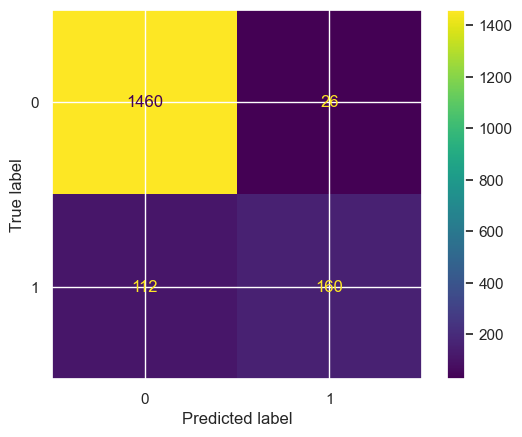

In [59]:
cm = confusion_matrix(y_test, y_pred, labels=lgboost_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lgboost_model.classes_)
disp.plot()
plt.show()

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


Text(0.5, 1.0, 'roc_curve')

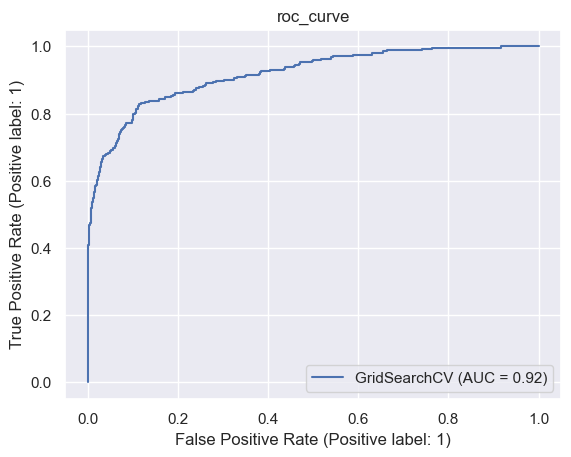

In [60]:
plot_roc_curve(lgboost_model, x_test, y_test)
plt.title('roc_curve')

In [61]:
y_pred = np.zeros_like(y_pred)
print('accuracy:', accuracy_score(y_test, y_pred))
print('precisison:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

accuracy: 0.8452787258248009
precisison: 0.0
recall: 0.0
F1: 0.0


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


In [62]:
y_pred = shuffle(y_test, random_state=100423)
print('accuracy:', accuracy_score(y_test, y_pred))
print('precisison:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

accuracy: 0.7428896473265074
precisison: 0.16911764705882354
recall: 0.16911764705882354
F1: 0.16911764705882354


Модель проявляет себя гораздо лучше случайной и константной, а значит модель адекватна

###  Важность признаков и интерпретация

Посмотрим на важность признаков

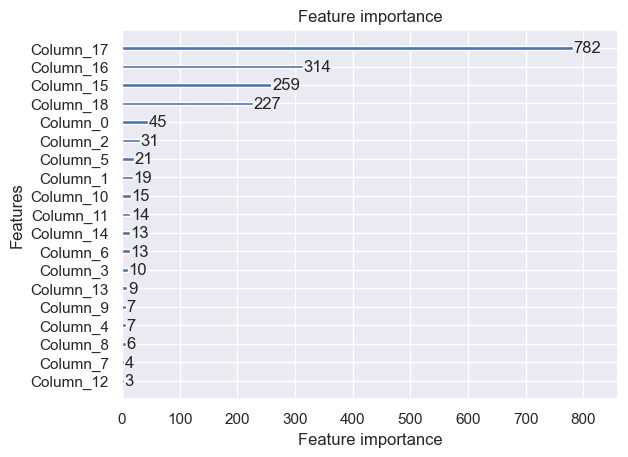

In [63]:
f_imp = lightgbm.plot_importance(lgboost_model.best_estimator_[1], ignore_zero=False).get_yticklabels()

In [64]:
f_imp = [int(re.search(r'_(\d+)', str(el))[0][1:]) for el in f_imp]
f_imp.reverse()
lgboost_model.feature_names_in_[f_imp]

array(['NumDays', 'MultipleLines', 'StreamingMovies', 'MeanCharges',
       'Type', 'PaymentMethod', 'gender', 'PaperlessBilling',
       'OnlineSecurity', 'OnlineBackup', 'StreamingTV', 'SeniorCitizen',
       'MonthlyCharges', 'TechSupport', 'InternetService', 'TotalCharges',
       'Dependents', 'Partner', 'DeviceProtection'], dtype=object)

Выделяются 4 лидера, важность этих признаков много превосходит остальные. Учитывая, что все признаки клиента для компании достаются достаточно просто, то удалять признаки не имеет большого смысла, однако можно понадеяться на:
* Возможное увеличение метрики
* Возможное уменьшение необходимого числа деревьев

Необходимая метрика уже достигнута, а время предикта не важно, поэтому пока идем дальше

In [65]:
explainer = shap.TreeExplainer(lgboost_model.best_estimator_[1])
X_tr = lgboost_model.best_estimator_[0].transform(X)
shap_values = explainer.shap_values(X_tr)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [66]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X.iloc[0,:], link='logit')

In [67]:
shap.force_plot(explainer.expected_value[1], shap_values[1][15,:], X.iloc[15,:], link='logit')

In [68]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:1000,:], X.iloc[:1000,:], link='logit')

Уходят чаще те, кто пользуются услугами достаточно давно, пользуются мультилинией и заключают контракт на 2 года.

**Вывод:**
* Протестировали lgboost('learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 600), auc-roc на тесте = 0.92
* Наиболее важные для модели оказались параметры 'StreamingMovies', 'TechSupport', 'StreamingTV'

Некоторые закономерности: 
* Уходят чаще те, кто пользуются услугами достаточно давно, пользуются мультилинией и заключают контракт на 2 года.

## Вывод

Проведен анализ данных и построена модель предсказывающая отток клиентов

*Первичный анализ по группам оттока показал, что*

* Люди, использующие и не использующие телефон уходят равновероятно, однако стоит обратить внимание на то, что среди клиентов использующих мультилинию процент ухода в 2 раза больше(19%) чем среди тех кто ее не использует.
* 10% клиентов не использующих интернет уходят, когда использующих DSL - 14%, а оптику почти 20%. Стоит обратить внимание на соотношение цена/качество интернета.

*Построена предсказывающая модель*
* lgboost('learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 600), 
* auc-roc на тесте = 0.92

*Определены на основе модели следующие закономерности*

* Уходят чаще те, кто пользуются услугами достаточно давно, пользуются мультилинией и заключают контракт на 2 года.

## Отчёт
*Ключевые шаги проекта*

* Первичный анализ датасета
* Конкатенация данных и анализ базовых групп оттока
* Препроцессинг
* Обучение нескольких моделей с перебором гиперпараметров
* Анализ моделей и выбор наилучшей
* Тестирование итоговой модели и анализ важности признаков

Были выполнены все пункты этого плана, обучены три разных модели, далее проведен их анализ, и выбранная модель проверена на тестовой выборке.

*В процессе выполнения работы возникли следующие трудности:*

Модель, обучаемая на датасете с признаком `BeginDate` хорошо себя показала на тестовой выборке, однако вела себя неадекватно с датами, которых она не видела. Проблема была решена заменой этого признака дополнительными, избегающими привязку к дате - продолжительность взаимоотношений с клиентом `NumDays` и средний чек за все время `MeanCharges`.

*Обучение модели* 

Модель обучалась на всем конкатенированном датасете, за исключением 11 объектов, которые начали сотрудничество в последнем месяце. Объекты, которых нет в таблицах internet и phone, были идентефецированы как не пользующиеся соответствующими услугами, пропуски были заполнены `No_internet` в графе провайдера и `No_phone` в графе о мультилинии, чтобы не плодить дополнительные признаки. Оставшиеся признаки связанные с интернетом заполнены значением `No`.

Модель обучалась на кросс-валидации с потоковой обработкой признаков с помощью OrdinalEncoder и QuantileTransformer, а так же с перебором гиперпараметров.

Итоговая модель - ансамбль lgboost('learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 600), auc-roc на тестовой выборке = 0.92